## Imports 

In [2]:
import pandas as pd
pd.options.display.max_columns = 999

import numpy as np
import os 
import sys
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
from matplotlib import rcParams

from scipy.stats import binned_statistic_2d
from astropy.table import Table
from astropy.table import vstack
from astropy.table import Column

import datetime

## Read-in the ugriz metrics for old (Var) and for new (VarC,  VarD) metrics

In [3]:
DirIn = '../data_products/varMetricsMerged/'
fname =  'Var_ugriz_11_patches_NCSA_narrow.csv' 
data1 = Table.read(DirIn+fname, format='csv')

In [210]:
fname = 'VarD__ugriz_7_patches_NCSA_narrow.csv.gz'
data2 = Table.read(DirIn+fname , format='csv')

In [ ]:
#fname = 'VarC__ugriz_6_patches_NCSA_narrow.csv.gz'
#data3 = Table.read(DirIn+fname , format='csv')

In [208]:
#f = 'VarD__ugriz_1_patches_NCSA_narrow.csv.gz'
#d = Table.read(DirIn+f, format='csv')

In [212]:
#data2

In [213]:
# since in VarD I don't have all objects, need to ensure that 
# I am making an inner join on objectId 

from astropy.table import join
data_new = join(left=data1, right=data2, keys='objectId', join_type='inner')

print(len(data1))
print(len(data2))
print(len(data_new))

4867169
2726355
2726355


In [14]:

outDir = os.path.join(os.getcwd()[:-4],'data_products/'+'Fig_chi2_compare',
                      datetime.datetime.now().strftime('%Y-%m-%d')+ '/')
if not os.path.exists(outDir): os.system('mkdir %s' % outDir)
print('We will save this figure in  %s'%outDir)



We will save this figure in  /Users/chris/GradResearch/SDSS_S82_FP_research/data_products/Fig_chi2_compare/2017-05-16/


In [27]:
import matplotlib.pyplot as plt
from matplotlib import rcParams      
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 20

In [48]:
m = data_new[f+'meanSN_bright'].data < 2
data_new[f+'meanSN_bright'].data[m]

masked_BaseColumn(data = [-- -- -- ..., -- -- --],
                  mask = [ True  True  True ...,  True  True  True],
            fill_value = 1e+20)

/Users/chris/GradResearch/SDSS_S82_FP_research/data_products/Fig_chi2_compare/2017-05-16/VarD_NCSA_7p_SN_histogram.png


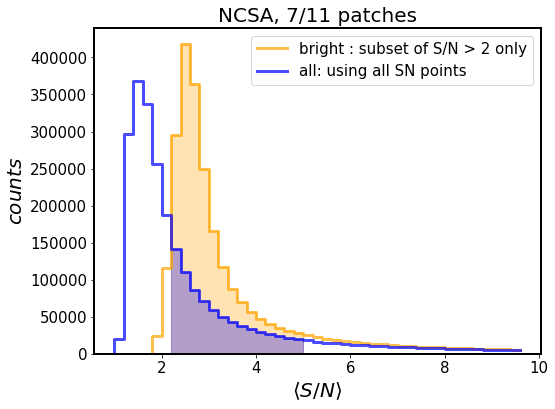

In [281]:

# all objects : no preselection of magnitude, type, etc 
%matplotlib inline
f = 'g'
bins=30
max_SN = 10
m = (0<data_new[f+'meanSN_bright'].data )*(data_new[f+'meanSN_bright'].data < max_SN)
fig,ax =plt.subplots(1,1,figsize=(8,6))

bins = np.arange(1,10,step=0.2)
hist, bin_edges = np.histogram(data_new[f+'meanSN_bright'].data[m], bins=bins)
bin_centres = bins[:-1] # (bin_edges[:-1] + bin_edges[1:])/2
hist[0] = 0  # to ensure that the histogram rectangles start at 0 …. 
ax.plot(bin_centres, hist, ls = 'steps', lw=3, color = 'orange',
        label='bright : subset of S/N > 2 only', alpha=0.7)

xmin, xmax = 2,5
ax.fill_between(bin_centres, 0, hist, 
                where = (bin_centres >= xmin)*(bin_centres<=xmax), 
                step='pre',  color='orange', alpha=0.3 )

m = data_new[f+'meanSN_all'].data< max_SN
hist, bin_edges = np.histogram(data_new[f+'meanSN_all'].data[m], bins=bins)
bin_centres = bins[:-1] # (bin_edges[:-1] + bin_edges[1:])/2
hist[0] = 0  # to ensure that the histogram rectangles start at 0 …. 
ax.plot(bin_centres, hist, ls = 'steps', lw=3, color = 'blue',
        label='all: using all SN points', alpha=0.7)

ax.fill_between(bin_centres, 0, hist, 
                where = (bin_centres >= xmin)*(bin_centres<=xmax), 
                step='pre',  color='blue', alpha=0.3 )


ax.set_title('NCSA, 7/11 patches', fontsize=20)
ax.set_xlabel(r'$\langle S/N \rangle$')
ax.set_ylabel(r'$counts$')
ax.set_ylim(0)

plt.legend(fontsize=15)
name = outDir + 'VarD_NCSA_7p_SN_histogram.png'
plt.savefig(name, bbox_inches='tight')
print(name)
# looks good : as expected, if we cut off the dim points, the mean goes up. 

/Users/chris/GradResearch/SDSS_S82_FP_research/data_products/Fig_chi2_compare/2017-05-16/


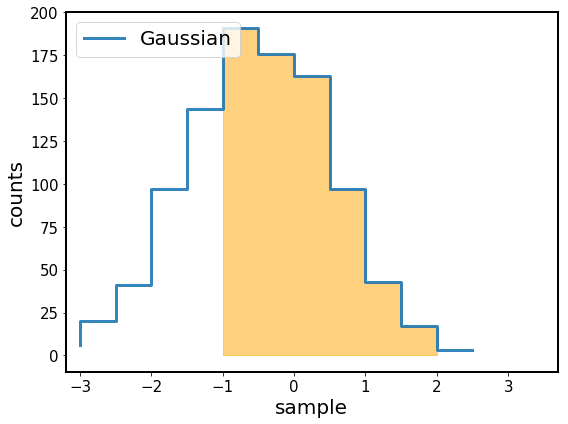

In [276]:
# Minimal example of fill_between under the histogram....
%matplotlib inline
fig,ax = plt.subplots(figsize=(8,6))

# draws from a Gaussian distribution
sample = np.random.normal(0,1, 1000)

x1 = -3
x2 = 3.5

xmin, xmax = -1,2

# define the histogram bins 
nbins=np.arange(x1,x2,0.5)  
lw = 3  # line width 

hist, bin_edges = np.histogram(sample, bins=nbins, density=False)
bin_centres = nbins[:-1]
ax.plot(bin_centres, hist, ls='steps',  label='Gaussian', lw=lw, alpha=0.9)

# shade area under the used histogram population.... 
ax.fill_between(bin_centres, 0, hist, 
                where = (bin_centres >= xmin)*(bin_centres<=xmax), 
                step='pre',  color='orange', alpha=0.5 )

ax.set_xlabel('sample') 
ax.set_ylabel('counts')

ax.set_xlim(x1-0.2, x2+0.2)
ticks = ax.get_xticks()
ax.set_xticks(ticks[1:-1])
plt.legend(loc='upper left', fontsize=20 )   
plt.tight_layout()
plt.savefig(outDir + 'Fig_histogram_shade_underneath_example.png')

print(outDir)

In [135]:
# what are these two points ? 
# absolutely no idea ...
# how could the error have negative magnitude  ??? 
data_new[e_new<0]

col0_1,uN,uchi2DOF,uchi2R,umuFull,upsfMeanErr,upsfMean_corr,gN,gchi2DOF,gchi2R,gmuFull,gpsfMeanErr,gpsfMean_corr,rN,rchi2DOF,rchi2R,rmuFull,rpsfMeanErr,rpsfMean_corr,iN,ichi2DOF,ichi2R,imuFull,ipsfMeanErr,ipsfMean_corr,zN,zchi2DOF,zchi2R,zmuFull,zpsfMeanErr,zpsfMean_corr,ebv_1,objectId,patch_1,deepSourceId_1,extendedness_1,ra_1,decl_1,col0_2,uN_bright,uN_all,uchi2DOF_bright,uchi2DOF_all,uchi2R_bright,uchi2R_all,umuFull_bright,umuFull_all,upsfMeanErr_bright,upsfMeanErr_all,upsfMean_corr_bright,upsfMean_corr_all,umeanSN_bright,umeanSN_all,gN_bright,gN_all,gchi2DOF_bright,gchi2DOF_all,gchi2R_bright,gchi2R_all,gmuFull_bright,gmuFull_all,gpsfMeanErr_bright,gpsfMeanErr_all,gpsfMean_corr_bright,gpsfMean_corr_all,gmeanSN_bright,gmeanSN_all,rN_bright,rN_all,rchi2DOF_bright,rchi2DOF_all,rchi2R_bright,rchi2R_all,rmuFull_bright,rmuFull_all,rpsfMeanErr_bright,rpsfMeanErr_all,rpsfMean_corr_bright,rpsfMean_corr_all,rmeanSN_bright,rmeanSN_all,iN_bright,iN_all,ichi2DOF_bright,ichi2DOF_all,ichi2R_bright,ichi2R_all,imuFull_bright,imuFull_all,ipsfMeanErr_bright,ipsfMeanErr_all,ipsfMean_corr_bright,ipsfMean_corr_all,imeanSN_bright,imeanSN_all,zN_bright,zN_all,zchi2DOF_bright,zchi2DOF_all,zchi2R_bright,zchi2R_all,zmuFull_bright,zmuFull_all,zpsfMeanErr_bright,zpsfMeanErr_all,zpsfMean_corr_bright,zpsfMean_corr_all,zmeanSN_bright,zmeanSN_all,ebv_2,patch_2,deepSourceId_2,extendedness_2,ra_2,decl_2
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str7,int64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,float64,str7,int64,int64,float64,float64
2130608,26.0,0.0630382933491,0.140823374409,3.34357819404e-07,0.656652324557,25.37526948,50.0,10.4775764096,3.65698624168,2.0010829762e-06,0.0447617667966,23.3439849952,56.0,13.365892645,2.55672439534,1.05977839172e-05,0.010143793567,21.4457520366,64.0,9.61481308936,2.33809769971,1.35023799166e-05,0.00956594920098,21.1363955695,66.0,1.51768029237,1.18820938847,1.79377298019e-05,0.0271070705331,20.838690564,0.0550207916797,217017212815279086,88_109,217017212815279086,0,338.816360103,-0.0711943267224,2130608,--,26.0,--,0.85901081999,--,0.541746062668,--,--,--,0.217671369168,--,--,--,1.10319166744,23.0,51.0,7.59159464684,2.57188335947e+16,2.89722750453,5.50451380775,--,--,0.0358358804959,-954.52570845,--,--,6.17333282603,3.99247725867,53.0,56.0,9.65296614973,82.1625595876,2.41361988289,2.55672439534,--,--,0.0100530875972,0.0118428396915,--,--,14.1173181026,13.4325614441,60.0,64.0,6.08382297887,57.4385229703,2.02521067407,2.33809769971,--,--,0.00949171429332,0.0107442196544,--,--,14.1379209375,13.3489833655,60.0,66.0,1.26182559141,1.62549705234,1.17684348963,1.18820938847,--,--,0.0270513820002,0.027132149013,--,--,5.03160710773,4.74358243599,0.0550207916797,88_109,217017212815279086,0,338.816360103,-0.0711943267224
2130615,27.0,0.0556929318291,0.143184048465,3.071525058e-07,0.683700391786,25.468043404,49.0,0.583746875596,0.237072393032,1.67490068445e-07,0.499137734371,26.0446627163,56.0,3.43719616233,0.481148177616,9.02508628673e-07,0.108590916829,24.1493604108,64.0,1.97512433884,0.881883715299,1.47701042198e-06,0.0817438019973,23.5797522411,66.0,0.542352312385,0.742892334041,5.13428944358e-06,0.0916946683254,22.202173758,0.0549029352122,217017212815279097,88_109,217017212815279097,0,338.813982518,-0.0699929334226,21306

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log10


/Users/chris/GradResearch/SDSS_S82_FP_research/data_products/Fig_chi2_compare/2017-05-16/VarD_NCSA_7p_error_comp.png


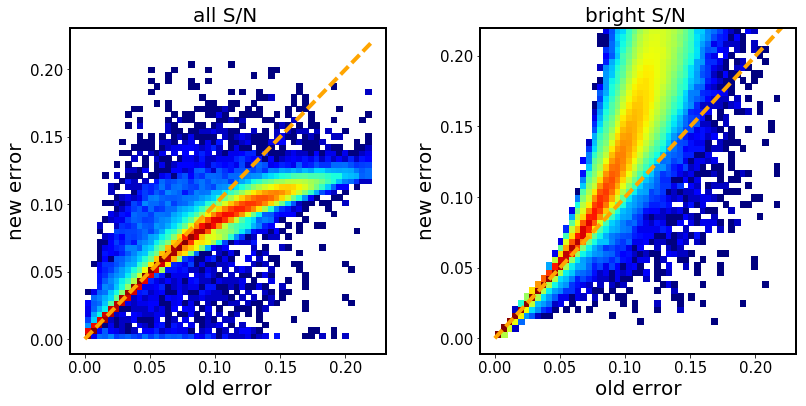

In [249]:
# e_old vs e_new ... 

f = 'g'
label = 'psfMeanErr'
suffix='_all'
fig, axes = plt.subplots(1,2, figsize=(13,6))
suffixes = ['_all', '_bright']
for ax, suffix in zip(axes, suffixes):
    e_old = data_new[f+label].data.data
    e_new = data_new[f+label+suffix].data.data
    m1 = (e_new>0) * (e_old>0)
    m2 = (e_new < 0.22) * (e_old < 0.22 )
    m = m1 * m2 

    image = plot_hist2d(e_old[m], e_new[m], e_old[m], 'count', 50, ax, 'jet')
    ax.set_xlabel('old error')
    ax.set_ylabel('new error')
    ax.set_title(suffix[1:] +' S/N ')
    x = np.linspace(0,0.22,100)
    ax.plot(x,x,ls='--',lw=4, color='orange')
fig.subplots_adjust(wspace = 0.3)
name = outDir + 'VarD_NCSA_7p_error_comp.png'
plt.savefig(name, bbox_inches='tight')
print(name)

In [216]:
#data_new.colnames

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log10
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:52: RuntimeWarning: divide by zero encountered in true_divide


/Users/chris/GradResearch/SDSS_S82_FP_research/data_products/Fig_chi2_compare/2017-05-16/VarD_NCSA_7p_error__all_SN_2-5_.png
/Users/chris/GradResearch/SDSS_S82_FP_research/data_products/Fig_chi2_compare/2017-05-16/VarD_NCSA_7p_error__all_SN_gt5_.png


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:52: RuntimeWarning: invalid value encountered in true_divide
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:54: RuntimeWarning: invalid value encountered in greater
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:55: RuntimeWarning: invalid value encountered in less


/Users/chris/GradResearch/SDSS_S82_FP_research/data_products/Fig_chi2_compare/2017-05-16/VarD_NCSA_7p_error__bright_SN_2-5_.png
/Users/chris/GradResearch/SDSS_S82_FP_research/data_products/Fig_chi2_compare/2017-05-16/VarD_NCSA_7p_error__bright_SN_gt5_.png


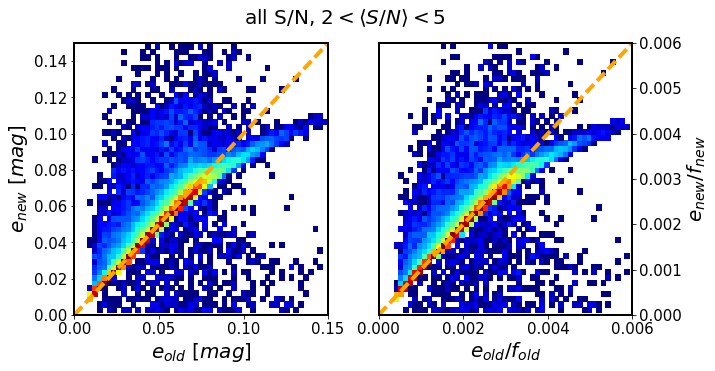

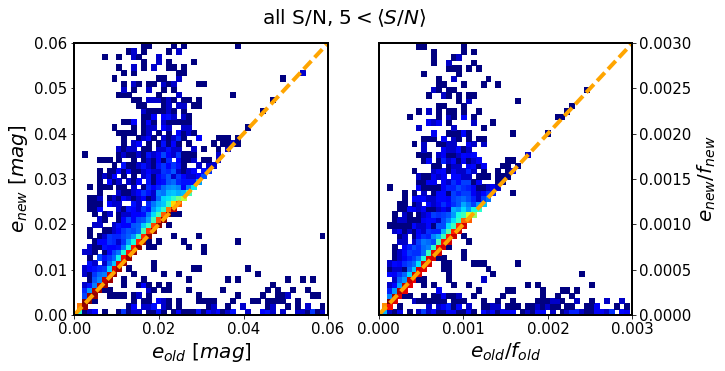

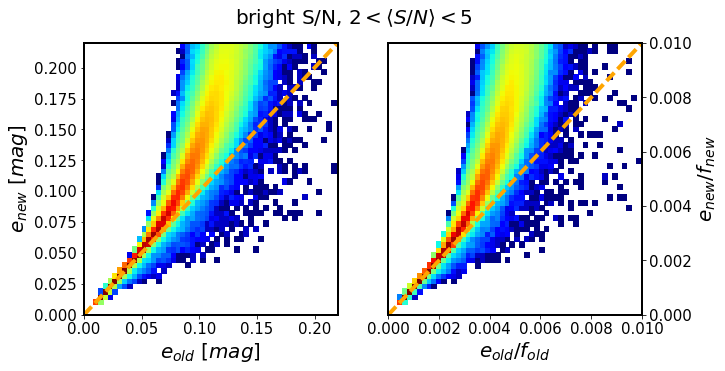

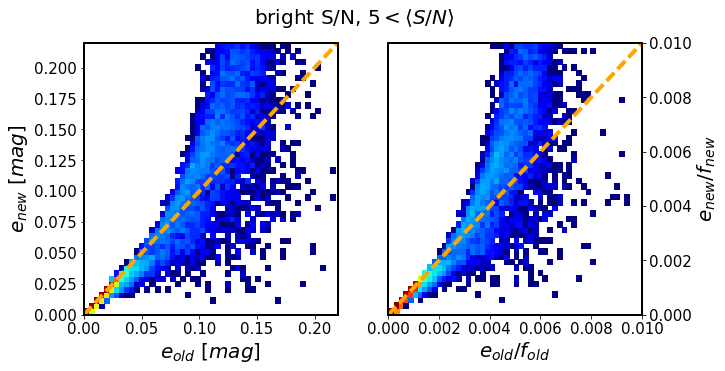

In [282]:
# add  mean(SN) selection 

f = 'g'
minSN, maxSN  = 2,5 
suffixes = ['_all', '_bright']
elims = [0.15, 0.06,  0.22, 0.22]
rlims = [0.006, 0.003,  0.01,0.01 ]

count = 0
for suffix  in suffixes : 
    
    
    
    titleA = suffix[1:]+' S/N, '+ str(minSN)+\
             r'$< \langle S/N \rangle < $'+str(maxSN)
    titleB = suffix[1:]+' S/N, '+ str(maxSN)+\
             r'$< \langle S/N \rangle $'
    titles = [titleA,titleB]
    nameA = '_SN_2-5_'
    nameB = '_SN_gt5_'
    names = [nameA, nameB]
    maskSNA = (minSN< data_new[f+'meanSN'+suffix].data)* \
    (data_new[f+'meanSN'+suffix].data < max_SN)
    maskSNB = (maxSN< data_new[f+'meanSN'+suffix].data)
    masksSN = [maskSNA, maskSNB]
    
    for title, name, maskSN in zip(titles, names, masksSN) : 
        # A and B 
        fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
        
        e_old = data_new[f+'psfMeanErr'].data.data
        e_new = data_new[f+'psfMeanErr'+suffix].data.data
        f_old = data_new[f+'psfMean_corr'].data.data
        f_new = data_new[f+'psfMean'+suffix].data.data
        
        elim = elims[count]
        rlim = rlims[count]
    
        m1 = (e_new>0) * (e_old>0)
        m2 = (e_new < elim) * (e_old < elim)
        m = m1 * m2 * maskSN
        
        image = plot_hist2d(e_old[m], e_new[m], e_old[m], 
                            'count', 50, ax1, 'jet')
        x = np.linspace(0,elim,100)
        ax1.plot(x,x,ls='--',lw=4, color='orange')
        
        ax1.set_xlim(0, elim)
        ax1.set_ylim(0, elim)
        
        ax1.set_xlabel(r'$e_{old} \, \,[mag]$')
        ax1.set_ylabel(r'$e_{new} \, \, [mag]$')
        
        r_old = e_old/ f_old
        r_new = e_new / f_new
        
        m1 = (r_new>0) * (r_old>0)
        m2 = (r_new < rlim) * (r_old < rlim)
        m = m1 * m2 * maskSN
 
        #mask_nans = (np.bitwise_not(np.isnan(r_old)))*\
        #(np.bitwise_not(np.isnan(r_new)))
        #r_old = r_old[mask_nans]
        #r_new = r_new[mask_nans]
        image = plot_hist2d(r_old[m], r_new[m], r_old[m], 
                            'count', 50, ax2, 'jet')
        x = np.linspace(0,rlim,100)
        ax2.plot(x,x,ls='--',lw=4, color='orange')
        ax2.set_xlim(0, rlim)
        ax2.set_ylim(0, rlim)
        ax2.set_xlabel(r'$e_{old}/ f_{old} $')
        ax2.set_ylabel(r'$e_{new} / f_{new}$')
        ax2.yaxis.set_label_position("right")
        ax2.yaxis.tick_right()
        fig.suptitle( title , fontsize=20)
        
        name = outDir + 'VarD_NCSA_7p_error_'+suffix+name+'.png'
        plt.savefig(name, bbox_inches='tight')
        print(name)

        count += 1 
        
        

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log10


/Users/chris/GradResearch/SDSS_S82_FP_research/data_products/Fig_chi2_compare/2017-05-16/VarD_NCSA_7p_error_comp_bright_SN_gt5_chi2region.png


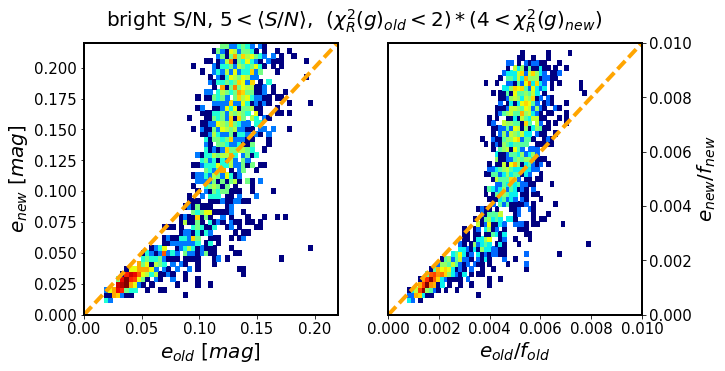

In [283]:
# Take only bright SN,     5 < mean(SN),  within 
# chi2R(g)_old   <   2   and    chi2R(g)_new > 4  : 
# plot the errors ...

f = 'g'
minSN, maxSN  = 2,5 
suffixes = ['_all', '_bright']
elims = [0.15, 0.22]
rlims = [0.008, 0.01 ]

suffix = suffixes[1]
elim = elims[1]
rlim = rlims[1]

titleA = suffix[1:]+' S/N, '+ str(minSN)+\
         r'$< \langle S/N \rangle < $'+str(maxSN)
titleB = suffix[1:]+' S/N, '+ str(maxSN)+\
         r'$< \langle S/N \rangle $'
titles = [titleA,titleB]

title = titles[1]
nameA = '_SN_2-5_'
nameB = '_SN_gt5_'
names = [nameA, nameB]
maskSNA = (minSN< data_new[f+'meanSN'+suffix].data)* \
(data_new[f+'meanSN'+suffix].data < max_SN)
maskSNB = (maxSN< data_new[f+'meanSN'+suffix].data)
masksSN = [maskSNA, maskSNB]
maskSN = masksSN[1]

chi2_old = data_new[f+'chi2R'].data.data 
chi2_new = data_new[f+'chi2R'+suffix].data.data

maskchi2 = (chi2_old < 2 ) * (4 < chi2_new)

# A and B 
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

e_old = data_new[f+'psfMeanErr'].data.data
e_new = data_new[f+'psfMeanErr'+suffix].data.data
f_old = data_new[f+'psfMean_corr'].data.data
f_new = data_new[f+'psfMean'+suffix].data.data

m1 = (e_new>0) * (e_old>0)
m2 = (e_new < 0.22) * (e_old < 0.22 )


m = m1 * m2 * maskSN * maskchi2

image = plot_hist2d(e_old[m], e_new[m], e_old[m], 
                    'count', 50, ax1, 'jet')
x = np.linspace(0,elim,100)
ax1.plot(x,x,ls='--',lw=4, color='orange')

ax1.set_xlim(0, elim)
ax1.set_ylim(0, elim)

ax1.set_xlabel(r'$e_{old} \, \,[mag]$')
ax1.set_ylabel(r'$e_{new} \, \, [mag]$')

r_old = e_old[m] / f_old[m]
r_new = e_new[m] / f_new[m]
mask_nans = (np.bitwise_not(np.isnan(r_old)))*\
(np.bitwise_not(np.isnan(r_new)))
r_old = r_old[mask_nans]
r_new = r_new[mask_nans]
image = plot_hist2d(r_old, r_new, r_old, 
                    'count', 50, ax2, 'jet')
x = np.linspace(0,rlim,100)
ax2.plot(x,x,ls='--',lw=4, color='orange')
ax2.set_xlim(0, rlim)
ax2.set_ylim(0, rlim)
ax2.set_xlabel(r'$e_{old}/ f_{old} $')
ax2.set_ylabel(r'$e_{new} / f_{new} $')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()

fig.suptitle( title + ',  '+r'$(\chi^{2}_{R}(g)_{old} < 2) * (4< \chi^{2}_{R}(g)_{new})$' ,
             fontsize=20)
name = outDir + 'VarD_NCSA_7p_error_comp_bright_SN_gt5_chi2region.png'
plt.savefig(name, bbox_inches='tight')
print(name)

In [194]:
f_new = data_new[f+'psfMean_corr'+suffix].data.data
       

In [204]:
data_new

col0_1,uN,uchi2DOF,uchi2R,umuFull,upsfMeanErr,upsfMean_corr,gN,gchi2DOF,gchi2R,gmuFull,gpsfMeanErr,gpsfMean_corr,rN,rchi2DOF,rchi2R,rmuFull,rpsfMeanErr,rpsfMean_corr,iN,ichi2DOF,ichi2R,imuFull,ipsfMeanErr,ipsfMean_corr,zN,zchi2DOF,zchi2R,zmuFull,zpsfMeanErr,zpsfMean_corr,ebv_1,objectId,patch_1,deepSourceId_1,extendedness_1,ra_1,decl_1,col0_2,uN_bright,uN_all,uchi2DOF_bright,uchi2DOF_all,uchi2R_bright,uchi2R_all,umuFull_bright,umuFull_all,upsfMeanErr_bright,upsfMeanErr_all,upsfMean_corr_bright,upsfMean_corr_all,umeanSN_bright,umeanSN_all,gN_bright,gN_all,gchi2DOF_bright,gchi2DOF_all,gchi2R_bright,gchi2R_all,gmuFull_bright,gmuFull_all,gpsfMeanErr_bright,gpsfMeanErr_all,gpsfMean_corr_bright,gpsfMean_corr_all,gmeanSN_bright,gmeanSN_all,rN_bright,rN_all,rchi2DOF_bright,rchi2DOF_all,rchi2R_bright,rchi2R_all,rmuFull_bright,rmuFull_all,rpsfMeanErr_bright,rpsfMeanErr_all,rpsfMean_corr_bright,rpsfMean_corr_all,rmeanSN_bright,rmeanSN_all,iN_bright,iN_all,ichi2DOF_bright,ichi2DOF_all,ichi2R_bright,ichi2R_all,imuFull_bright,imuFull_all,ipsfMeanErr_bright,ipsfMeanErr_all,ipsfMean_corr_bright,ipsfMean_corr_all,imeanSN_bright,imeanSN_all,zN_bright,zN_all,zchi2DOF_bright,zchi2DOF_all,zchi2R_bright,zchi2R_all,zmuFull_bright,zmuFull_all,zpsfMeanErr_bright,zpsfMeanErr_all,zpsfMean_corr_bright,zpsfMean_corr_all,zmeanSN_bright,zmeanSN_all,ebv_2,patch_2,deepSourceId_2,extendedness_2,ra_2,decl_2
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str7,int64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,float64,str7,int64,int64,float64,float64
0,68.0,1.25743138146,0.838814252877,1.58945519773e-06,0.0884176020084,23.6044272835,72.0,1.91917056033,1.17533911054,1.51043360463e-06,0.0423788788777,23.6490481039,72.0,1.46656227854,0.903481488195,2.67118008888e-06,0.0341142466056,22.9514978826,72.0,1.57776565001,0.98944237556,3.77050891995e-06,0.0349856494124,22.5582320654,72.0,1.08211670012,0.709542307811,5.3420177886e-06,0.094586749273,22.1426129428,0.0405644489542,216172782516437336,00_21,216172782516437336,1,359.974019436,-1.25626927667,0,13.0,68.0,3.78553748723,3.42249957918,1.181940464,1.13438949542,--,--,0.108677753448,0.0850095473767,--,--,2.9557754303,1.85782587199,48.0,72.0,2.01697365431,2.37716989194,1.35843542751,1.2163641278,--,--,0.0427860999175,0.0422212275316,--,--,3.70105607962,3.00794537378,58.0,72.0,1.53681392502,1.5798573114,1.13910661367,1.04380704199,--,--,0.0344580934508,0.0340016861457,--,--,4.11826451795,3.66219546757,67.0,72.0,1.7304271,1.59689175572,1.00539616131,0.98944382483,--,--,0.0351479038621,0.0349196827161,--,--,3.81445434364,3.67233736922,15.0,72.0,0.923038069371,3.04795790968,0.787676568117,0.952000153493,--,--,0.107848507416,0.0870927458127,--,--,2.68602586412,1.76305970073,0.0405644489542,00_21,216172782516437336,1,359.974019436,-1.25626927667
1,70.0,0.771600724422,0.634223800434,9.49340372731e-07,0.142517545406,24.1739578061,74.0,1.91724829392,1.39164329076,4.3315457244e-06,0.015061399496,22.4696200815,73.0,1.45492164753,1.16925941699,1.52224468203e-05,0.00697879508529,21.0603973464,74.0,0.784612782391,0.757890601418,2.79821914999e-05,0.0056490789017,20.3695122705,75.0,1.82290644927,1.08801266508,4.17823771916e-05,0.0127678978498,19.9109994047,0.0416638178678,216172782516437339,00_21,216172782516437339,0,359.925061952,-1.25

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log10


saved /Users/chris/GradResearch/SDSS_S82_FP_research/data_products/Fig_chi2_compare/2017-05-16/Fig_chi2_compare_all_SN_2-5_.png
saved /Users/chris/GradResearch/SDSS_S82_FP_research/data_products/Fig_chi2_compare/2017-05-16/Fig_chi2_compare_all_SN_gt5_.png
saved /Users/chris/GradResearch/SDSS_S82_FP_research/data_products/Fig_chi2_compare/2017-05-16/Fig_chi2_compare_bright_SN_2-5_.png
saved /Users/chris/GradResearch/SDSS_S82_FP_research/data_products/Fig_chi2_compare/2017-05-16/Fig_chi2_compare_bright_SN_gt5_.png


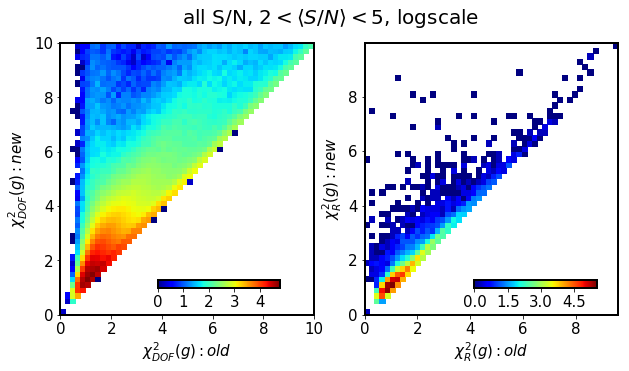

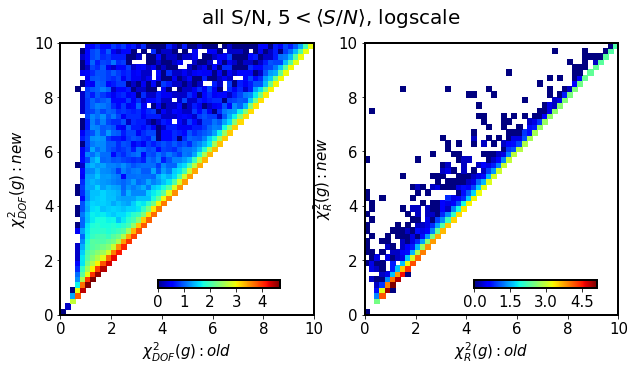

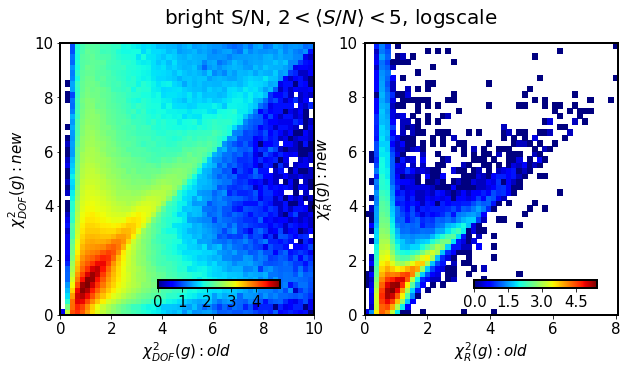

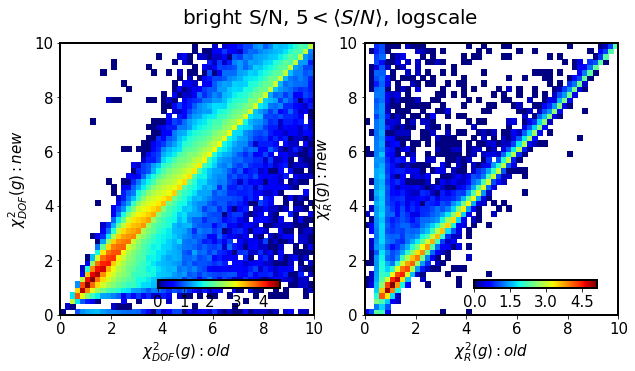

In [224]:
from matplotlib import ticker

def plot_hist2d(x,y,values, statistic, bins, ax, cmap):
    ''' Convenience function to make a 2d histogram 
    '''
    stats = binned_statistic_2d(x, y, values, statistic='count', bins=50)
    z_sigma, x_edges, y_edges = stats[0], stats[1], stats[2]
    z_sigma[np.isnan(z_sigma)] =0 # replace all nan's by 0 ...
    z_reduce  =  z_sigma
    z_min, z_max = z_reduce.min(), np.abs(z_reduce).max()
    z_rot = np.rot90(z_reduce)  # rotate and flip to properly display... 
    z_rot_flip = np.flipud(z_rot)
    z_masked = np.ma.masked_where(z_rot_flip == 0 , z_rot_flip)
    # Plot 2D histogram using pcolor
    image = ax.pcolormesh(x_edges,y_edges, np.log10(z_masked), cmap='jet')
    return image 

# Plot data2.colnames
# in each case we want to plot 
# chi2_OLD, i.e. from Var... metrics ,  vs  chi2_NEW,  
# i.e. from VarD .. metrics 

# since in VarD I don't have all objects, need to ensure that 
# I am making an inner join on objectId 

# 1) first : '_all' : ligthcurves where all points were used for calculating metrics, 
# as well as  mean S/N 


f = 'g'
cbar_dx, cbar_dy = 0.17, 0.02
cbar_x0s = 0.26, 0.7 


###  1a)  2 < mean S/N < 5 
minSN, maxSN  = 2,5 

suffixes = ['_all', '_bright']

for suffix in suffixes : 
    titleA = suffix[1:]+' S/N, '+ str(minSN)+\
             r'$< \langle S/N \rangle < $'+str(maxSN)+', logscale'
    titleB = suffix[1:]+' S/N, '+ str(maxSN)+\
             r'$< \langle S/N \rangle $'+', logscale'
    titles = [titleA,titleB]
    nameA = '_SN_2-5_'
    nameB = '_SN_gt5_'
    names = [nameA, nameB]
    maskSNA = (minSN< data_new[f+'meanSN'+suffix].data)* (data_new[f+'meanSN'+suffix].data < max_SN)
    maskSNB = (maxSN< data_new[f+'meanSN'+suffix].data)
    masksSN = [maskSNA, maskSNB]

    for title, name, maskSN in zip(titles, names, masksSN) : 
        # A and B 
        fig, axes = plt.subplots(1,2,figsize=(10,5))
        labels = ['chi2DOF', 'chi2R']
        chi2types = ['DOF', 'R']
        for label, chi2type, ax, x0 in zip(labels, chi2types,axes, cbar_x0s):
            # left and right 
            #print(f,label,suffix)
            chi2_old = data_new[f+label].data.data
            chi2_new = data_new[f+label+suffix].data.data
            mask_chi2 = (chi2_old < 10)*(chi2_new<10)
            m = maskSN * mask_chi2
            x = chi2_old[m]  # 'old' chi2
            y = chi2_new[m] # 'new' chi2 
            #print(max(x), max(y))
            image = plot_hist2d(x,y,x, 'count', 50, ax, 'jet')

            ax.set_xlabel(r'$\chi^{2}_{'+chi2type+'}('+f+') : old$', fontsize=15)
            ax.set_ylabel(r'$\chi^{2}_{'+chi2type+'}('+f+') : new$', fontsize=15)

            # add colorbar 
            colorbar_ax = fig.add_axes([x0, 0.2, cbar_dx, cbar_dy])
            colorbar = fig.colorbar(image,  cax=colorbar_ax, orientation='horizontal')
            tick_locator = ticker.MaxNLocator(nbins=5)
            colorbar.locator = tick_locator
            colorbar.update_ticks()

        fig.suptitle(title, fontsize=20)   
        figname = outDir + 'Fig_chi2_compare_'+ suffix[1:]+name+'.png'
        print('saved %s'%figname)
        plt.savefig(figname, bbox_inches='tight')

###   1b)     5 < mean(S/N) 




# 2)  second: '_bright':  lightcurves where only points brighter than S/N = 2 were 
# used for calculating metrics 

###  2a) mean  2 < S/N < 5 


### 2b) mean  5 < S/N 

In [109]:
mask_chi2 = (chi2_old < 10)*(chi2_new<10)
m = mask_chi2 * maskSN

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log10


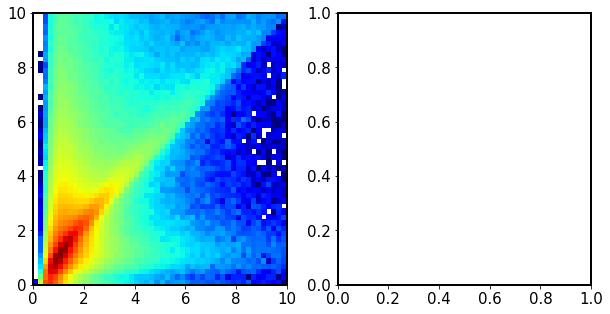

In [124]:
chi2_old = data_new[f+label].data.data
chi2_new = data_new[f+label+suffix].data.data
mask_chi2 = (chi2_old < 10)*(chi2_new<10)
m = maskSN * mask_chi2
x = chi2_old[m]  # 'old' chi2
y = chi2_new[m] # 'new' chi2 


fig,(ax1,ax2)  = plt.subplots(1,2, figsize=(10,5))
image = plot_hist2d(x,y,x, 'count', 50, ax1, 'jet')

In [121]:

chi2_new.data

array([ 2.01697365,  2.29705336,  3.18709518, ...,  4.63149705,
        1.08712391,  0.54870936])

In [ ]:
# Given all this discrepancies : try 
# rerunning in an 'old' way, i.e. keeping error unchanged,
# could it affect chi2 so much ?  ?? ? ? 

# think about it again - what would you expect  - 
# is there any null thing that should not change? 

# well,  in the old way we always had some points that were bright , 
# and some that were faint, 
# but hopefully if we use lightcurves that have mean S/N  > 5 , 
# then even in the old way the small S/N shouldn't affect the result,
# and thus the new chi2 for mean S/N > 5 should be 
# very similar to old chi2.... 